In [1]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
crime_data_full= pd.read_csv('/Users/jonathanpoulsen/Documents/Repos/Big-Data-Project-Crimes-in-Chicargo/Crimes_-_2001_to_Present.csv')

In [3]:
crime_data_full.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,13006712,JG181347,03/10/2023 11:57:00 PM,001XX W LAKE ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,CTA PLATFORM,True,False,...,-87.631712,"(41.885741029, -87.631711749)",22.0,14309.0,38.0,92.0,36.0,42.0,22.0,79.0
1,13007287,JG182176,03/10/2023 11:50:00 PM,036XX S IRON ST,0820,THEFT,$500 AND UNDER,COMMERCIAL / BUSINESS OFFICE,False,False,...,-87.659316,"(41.828194666, -87.659315849)",26.0,14924.0,56.0,721.0,48.0,37.0,23.0,165.0
2,13011659,JG181327,03/10/2023 11:50:00 PM,037XX N ASHLAND AVE,0560,ASSAULT,SIMPLE,SIDEWALK,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13006710,JG181316,03/10/2023 11:46:00 PM,008XX E 93RD ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,...,-87.603908,"(41.725713691, -87.603907574)",9.0,21546.0,40.0,429.0,35.0,61.0,20.0,248.0
4,13006789,JG181313,03/10/2023 11:40:00 PM,100XX S LAFAYETTE AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,-87.624833,"(41.711933671, -87.624833412)",30.0,21861.0,45.0,569.0,43.0,19.0,10.0,250.0


In [4]:
# List of columns to keep
columns_to_keep = ['Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 
                   'Arrest', 'Domestic', 'Community Area', 'FBI Code', 
                   'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']

# Create a new DataFrame with only the columns you want to keep
crime_data_full = crime_data_full[columns_to_keep]


In [5]:
# Check for null values in each column as a percentage of total rows
null_values_percentage = (crime_data_full.isnull().sum() / len(crime_data_full)) * 100

# Print columns with null values
print(null_values_percentage[null_values_percentage > 0])


Location Description    0.131375
Community Area          7.910835
X Coordinate            1.102725
Y Coordinate            1.102725
Latitude                1.102725
Longitude               1.102725
dtype: float64


In [6]:
# Drop rows with any null values
crime_data_full = crime_data_full.dropna()


In [7]:
# Convert columns to 'category' data type
crime_data_full['IUCR'] = crime_data_full['IUCR'].astype('category')
crime_data_full['Community Area'] = crime_data_full['Community Area'].astype('category')
crime_data_full['FBI Code'] = crime_data_full['FBI Code'].astype('category')
crime_data_full['Primary Type'] = crime_data_full['Primary Type'].astype('category')


In [8]:
# Check data types of each column
print(crime_data_full.dtypes)


Date                      object
Block                     object
IUCR                    category
Primary Type            category
Description               object
Location Description      object
Arrest                      bool
Domestic                    bool
Community Area          category
FBI Code                category
X Coordinate             float64
Y Coordinate             float64
Year                       int64
Latitude                 float64
Longitude                float64
dtype: object


In [9]:
# Check for duplicate rows
duplicate_rows = crime_data_full.duplicated()

# Print number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")


Number of duplicate rows: 17562


In [10]:
# Remove duplicate rows
crime_data_full = crime_data_full.drop_duplicates()


In [11]:
# Convert 'Date' column to datetime
crime_data_full['Date'] = pd.to_datetime(crime_data_full['Date'])

# Set 'Date' as the index
crime_data_full.set_index('Date', inplace=True)

# Check index of DataFrame
print(crime_data_full.index)


DatetimeIndex(['2023-03-10 23:57:00', '2023-03-10 23:50:00',
               '2023-03-10 23:46:00', '2023-03-10 23:40:00',
               '2023-03-10 23:38:00', '2023-03-10 23:34:00',
               '2023-03-10 23:30:00', '2023-03-10 23:30:00',
               '2023-03-10 23:30:00', '2023-03-10 23:30:00',
               ...
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Date', length=7041053, freq=None)


### Analysis

In [12]:
# List of columns to keep
columns_to_keep = ['Primary Type', 'Domestic', 'Community Area', 'Year', 'Arrest']

# Create a new DataFrame with only the columns you want to keep
crime_data_simplified = crime_data_full[columns_to_keep]


In [13]:
# Create dummy variables for 'Primary Type', 'Arrest', and 'Domestic'
crime_data_simplified = pd.get_dummies(crime_data_simplified, columns=['Primary Type', 'Arrest', 'Domestic'])


In [14]:
# Set target variable
y = crime_data_simplified['Arrest_True']

# Set feature variables
X = crime_data_simplified[['Community Area', 'Year', 'Domestic_True', 'Domestic_False', 
                           'Primary Type_THEFT', 'Primary Type_BATTERY', 
                           'Primary Type_CRIMINAL DAMAGE', 'Primary Type_NARCOTICS',
                           'Primary Type_ASSAULT', 'Primary Type_DECEPTIVE PRACTICE', 
                           'Primary Type_OTHER OFFENSE', 'Primary Type_BURGLARY', 
                           'Primary Type_MOTOR VEHICLE THEFT', 'Primary Type_ROBBERY']]


In [15]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [16]:
# Calculate correlation of all variables with 'Arrest_True'
correlation = crime_data_simplified.corr()['Arrest_True'].sort_values()

# Print correlation
print(correlation)


/var/folders/gz/m7hcm7_d3q3bv0lwnd3p42dw0000gn/T/ipykernel_12800/2381974691.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = crime_data_simplified.corr()['Arrest_True'].sort_values()


Arrest_False                                     -1.000000
Primary Type_THEFT                               -0.176988
Primary Type_CRIMINAL DAMAGE                     -0.158152
Primary Type_BURGLARY                            -0.111609
Year                                             -0.103930
Primary Type_MOTOR VEHICLE THEFT                 -0.092117
Primary Type_ROBBERY                             -0.075122
Domestic_True                                    -0.065591
Primary Type_DECEPTIVE PRACTICE                  -0.060967
Primary Type_OTHER OFFENSE                       -0.048711
Primary Type_BATTERY                             -0.041754
Primary Type_ASSAULT                             -0.028435
Primary Type_CRIM SEXUAL ASSAULT                 -0.014533
Primary Type_OFFENSE INVOLVING CHILDREN          -0.013400
Primary Type_ARSON                               -0.013014
Primary Type_CRIMINAL SEXUAL ASSAULT             -0.012356
Primary Type_KIDNAPPING                          -0.0103

/var/folders/gz/m7hcm7_d3q3bv0lwnd3p42dw0000gn/T/ipykernel_12800/1674873130.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = crime_data_simplified.corr()


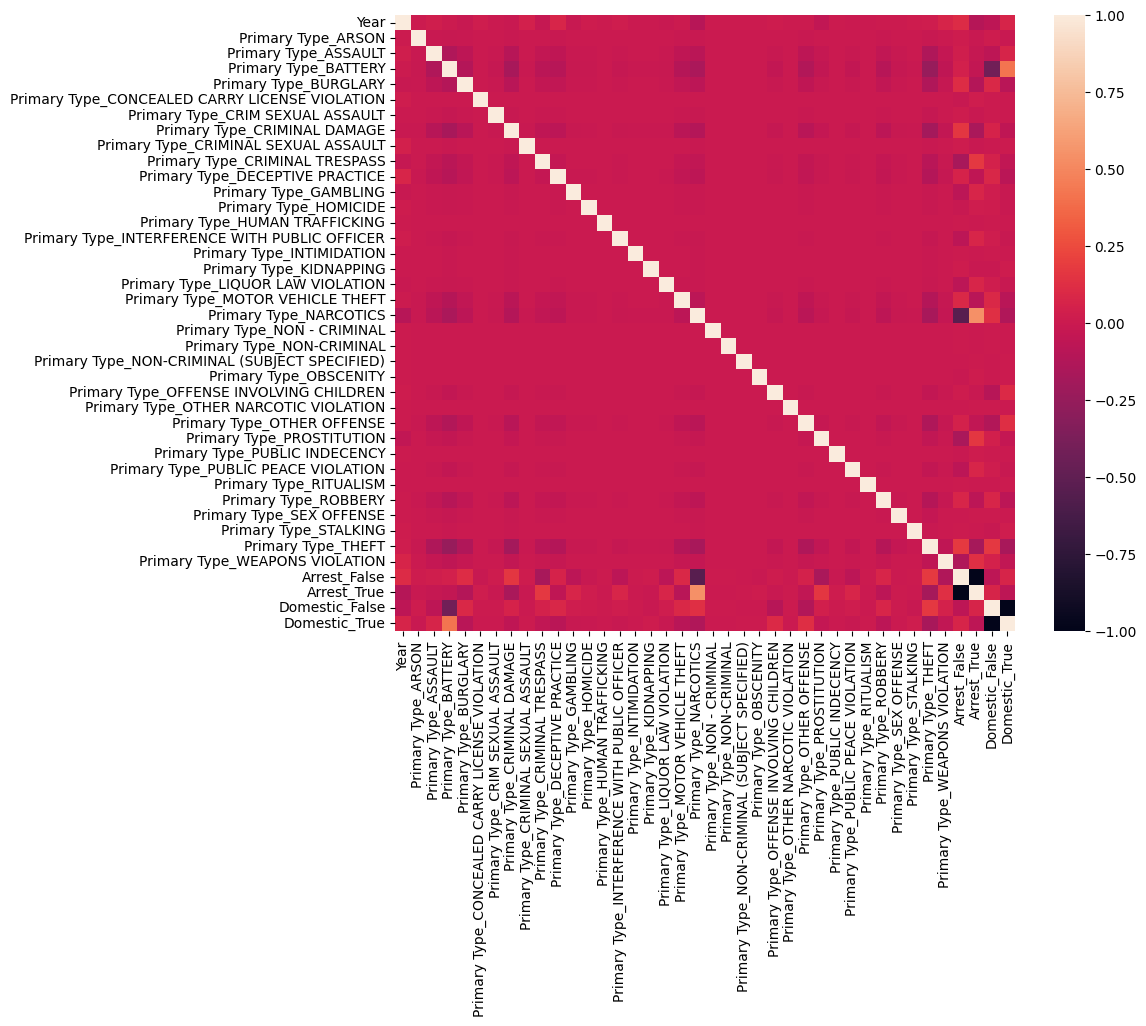

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = crime_data_simplified.corr()

# Create a heatmap
plt.figure(figsize=(10,8))  # Optional: You can set the figure size
sns.heatmap(corr_matrix)

plt.show()


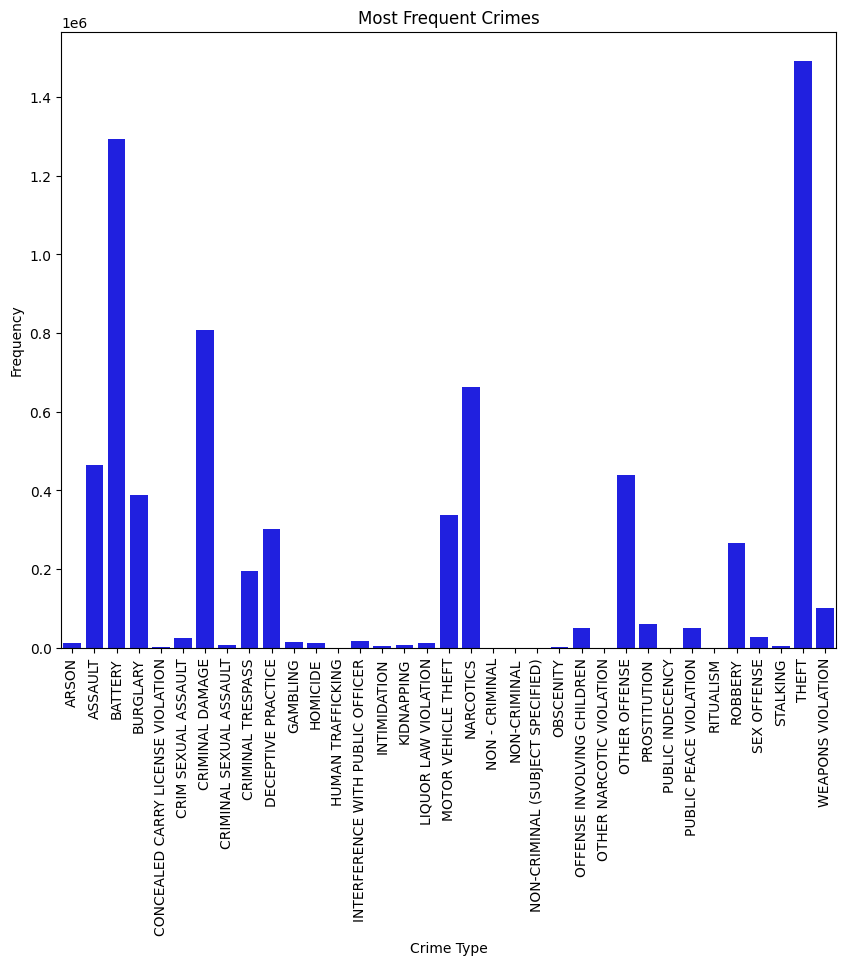

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each crime type and sort
crime_counts = crime_data_full['Primary Type'].value_counts()

# Create a bar plot of the most frequent crimes
plt.figure(figsize=(10,8))  # Optional: You can set the figure size
sns.barplot(x=crime_counts.index, y=crime_counts.values, color='b')

plt.title('Most Frequent Crimes')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

plt.show()


In [19]:
# List of columns to keep
columns_to_keep = ['Arrest_True', 'Arrest_False', 'Community Area', 'Year', 'Domestic_True', 'Domestic_False', 
                   'Primary Type_THEFT', 'Primary Type_BATTERY', 'Primary Type_NARCOTICS', 'Primary Type_CRIMINAL DAMAGE']

# Create a new DataFrame with only the columns you want to keep
crime_data_narrowed = crime_data_simplified[columns_to_keep]


In [20]:
# Calculate correlation of all variables with 'Arrest_True'
correlation = crime_data_narrowed.corr()['Arrest_True'].sort_values()

# Print correlation
print(correlation)


/var/folders/gz/m7hcm7_d3q3bv0lwnd3p42dw0000gn/T/ipykernel_12800/3794449302.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = crime_data_narrowed.corr()['Arrest_True'].sort_values()


Arrest_False                   -1.000000
Primary Type_THEFT             -0.176988
Primary Type_CRIMINAL DAMAGE   -0.158152
Year                           -0.103930
Domestic_True                  -0.065591
Primary Type_BATTERY           -0.041754
Domestic_False                  0.065591
Primary Type_NARCOTICS          0.540639
Arrest_True                     1.000000
Name: Arrest_True, dtype: float64


/var/folders/gz/m7hcm7_d3q3bv0lwnd3p42dw0000gn/T/ipykernel_12800/3231707472.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = crime_data_narrowed.corr()


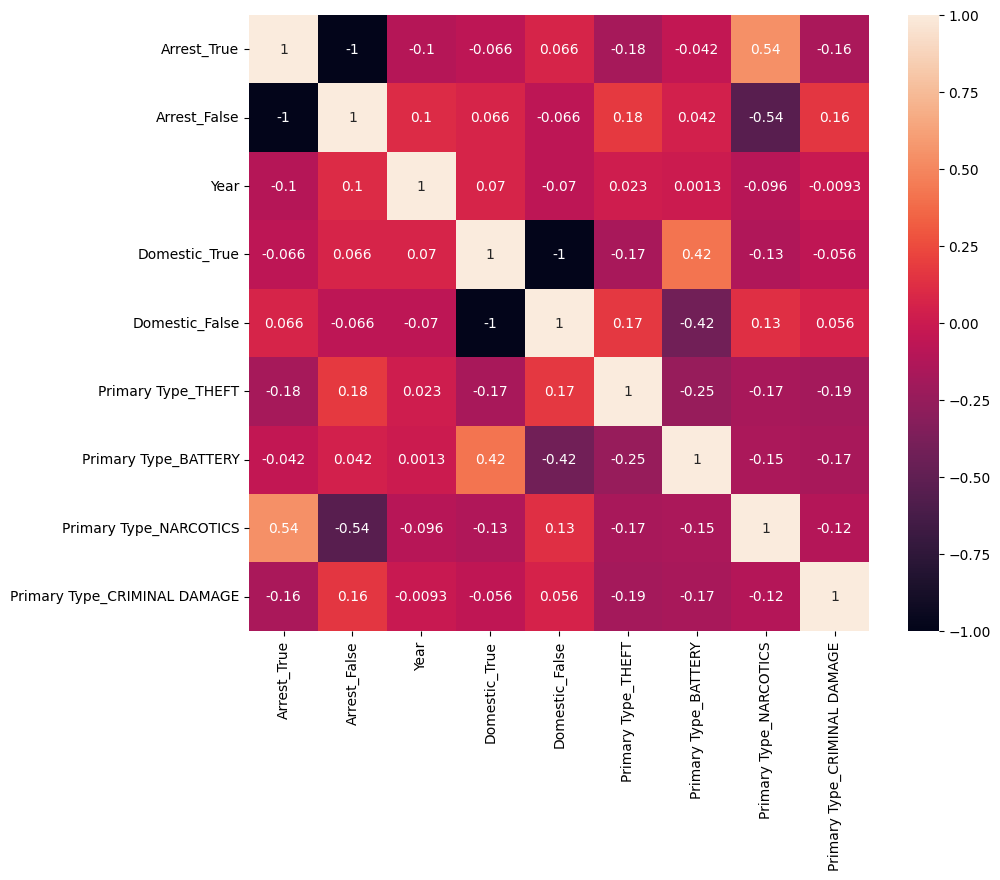

In [21]:
# Calculate correlation matrix
corr_matrix = crime_data_narrowed.corr()

# Create a heatmap
plt.figure(figsize=(10,8))  # Optional: You can set the figure size
sns.heatmap(corr_matrix, annot=True)

plt.show()


### Dummy Classifier

In [22]:
from sklearn.dummy import DummyClassifier

# Create a Dummy Classifier
dummy = DummyClassifier(strategy='most_frequent')

# Fit the model
dummy.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [23]:
# Calculate accuracy on the test data
accuracy = dummy.score(X_test, y_test)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 74.12%


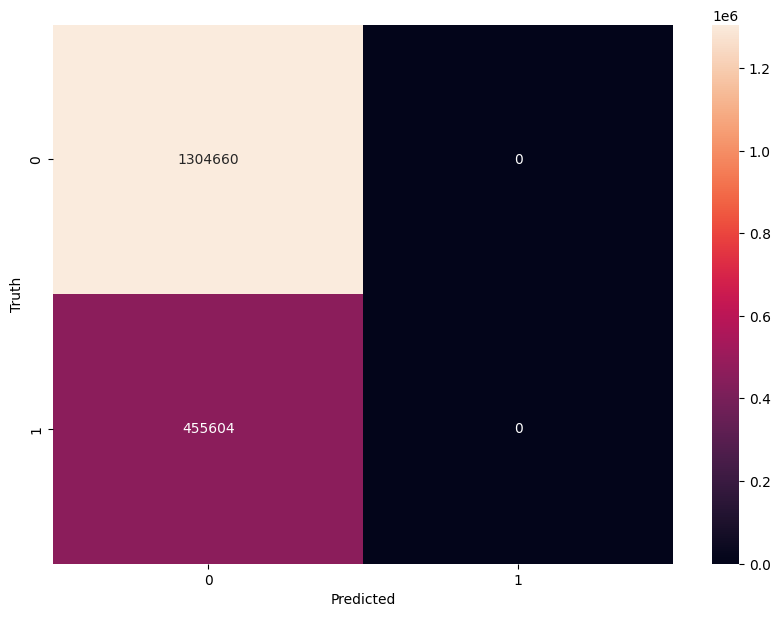

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test data
y_pred = dummy.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()


### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [23]:
# Calculate accuracy on the test data
accuracy = logreg.score(X_test, y_test)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 85.62%


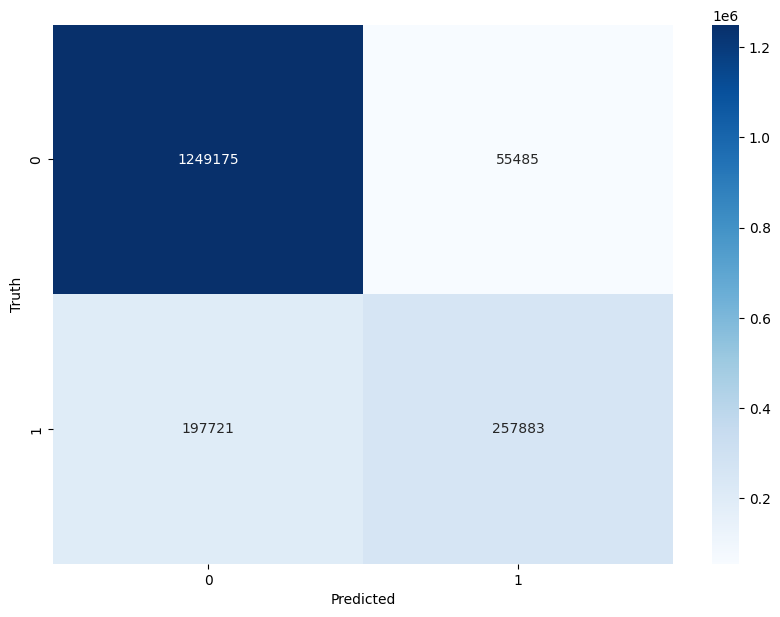

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test data
y_pred = logreg.predict(X_test)

# Create confusion matrix
cmlogreg = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cmlogreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()


In [25]:
# Contingency Table 1: Theft Crimes vs Arrest
table1 = pd.crosstab(crime_data_full['Primary Type'] == 'THEFT', crime_data_full['Arrest'])
print("Contingency Table 1: Theft Crimes vs Arrest")
print(table1)

# Contingency Table 2: Narcotics Crimes vs Arrest
table2 = pd.crosstab(crime_data_full['Primary Type'] == 'NARCOTICS', crime_data_full['Arrest'])
print("\nContingency Table 2: Narcotics Crimes vs Arrest")
print(table2)

# Contingency Table 3: Criminal Damage Crimes vs Arrest
table3 = pd.crosstab(crime_data_full['Primary Type'] == 'CRIMINAL DAMAGE', crime_data_full['Arrest'])
print("\nContingency Table 3: Criminal Damage Crimes vs Arrest")
print(table3)


Contingency Table 1: Theft Crimes vs Arrest
Arrest          False    True 
Primary Type                  
False         3890651  1658720
True          1328760   162922

Contingency Table 2: Narcotics Crimes vs Arrest
Arrest          False    True 
Primary Type                  
False         5215266  1163893
True             4145   657749

Contingency Table 3: Criminal Damage Crimes vs Arrest
Arrest          False    True 
Primary Type                  
False         4466365  1768313
True           753046    53329


Precision: 0.8229398024048403
Recall (Sensitivity): 0.5660244422788211
F-score: 0.6707214306892839
Specificity: 0.9574716784449588


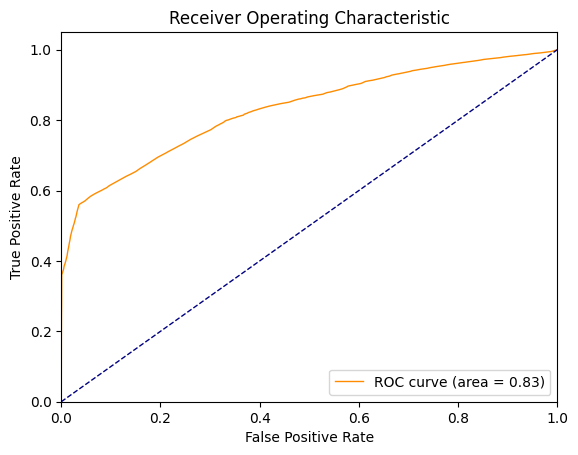

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predict the test data
y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F-score: {f_score}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print(f"Specificity: {specificity}")

# Plot ROC curve
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#### Overfitting?

One common way to check for overfitting is to compare the model's performance (e.g., accuracy or loss) on the training set and the test set. If the model performs significantly better on the training set than on the test set, it might be overfitting.

If the training accuracy is significantly higher than the test accuracy, your model might be overfitting. If the accuracies are similar, your model is likely not overfitting.

In [27]:
# Calculate accuracy on the training data
train_accuracy = logreg.score(X_train, y_train)

# Calculate accuracy on the test data
test_accuracy = logreg.score(X_test, y_test)

# Print accuracies
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 85.64%
Test Accuracy: 85.62%


### Tuning

Using GridSearchCV to find the optimal parameters

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# Define the parameter grid
# param_grid = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga']
# }

# Create a Logistic Regression model
# logregv2 = LogisticRegression(max_iter=1000)

# Create a GridSearchCV object
# grid_search = GridSearchCV(logregv2, param_grid, verbose=2, cv=5, scoring='accuracy')

# Fit the model to the data
# grid_search.fit(X_train, y_train)

# Get the best parameters
# best_params = grid_search.best_params_

# print(f"Best parameters: {best_params}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits


### Log with tune

In [28]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logregv3 = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=1000)

# Fit the model
logregv3.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

In [29]:
# Calculate accuracy on the test data
accuracy = logregv3.score(X_test, y_test)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.60%


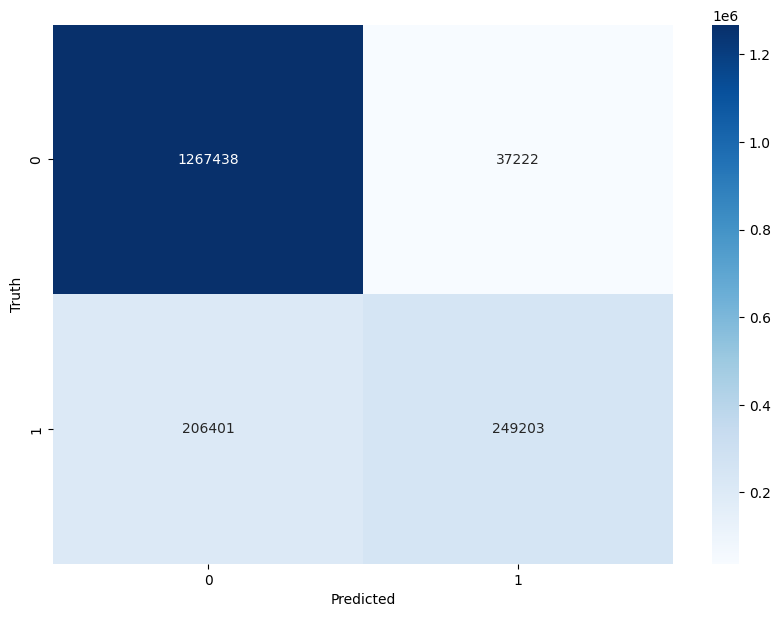

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test data
y_pred_logistic = logregv3.predict(X_test)

# Create confusion matrix
cmlogregv3 = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cmlogregv3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

In [31]:
# Contingency Table 1: Theft Crimes vs Arrest
table1 = pd.crosstab(crime_data_full['Primary Type'] == 'THEFT', crime_data_full['Arrest'])
print("Contingency Table 1: Theft Crimes vs Arrest")
print(table1)

# Contingency Table 2: Narcotics Crimes vs Arrest
table2 = pd.crosstab(crime_data_full['Primary Type'] == 'NARCOTICS', crime_data_full['Arrest'])
print("\nContingency Table 2: Narcotics Crimes vs Arrest")
print(table2)

# Contingency Table 3: Criminal Damage Crimes vs Arrest
table3 = pd.crosstab(crime_data_full['Primary Type'] == 'CRIMINAL DAMAGE', crime_data_full['Arrest'])
print("\nContingency Table 3: Criminal Damage Crimes vs Arrest")
print(table3)


Contingency Table 1: Theft Crimes vs Arrest
Arrest          False    True 
Primary Type                  
False         3890651  1658720
True          1328760   162922

Contingency Table 2: Narcotics Crimes vs Arrest
Arrest          False    True 
Primary Type                  
False         5215266  1163893
True             4145   657749

Contingency Table 3: Criminal Damage Crimes vs Arrest
Arrest          False    True 
Primary Type                  
False         4466365  1768313
True           753046    53329


Precision: 0.8221729249736249
Recall (Sensitivity): 0.5661736946997832
F-score: 0.6705712766800938
Specificity: 0.9572363680959024


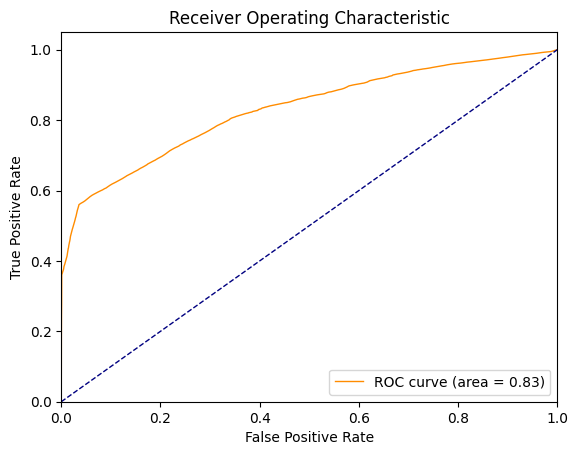

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predict the test data
y_pred = logregv3.predict(X_test)

# Calculate precision, recall, and F-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F-score: {f_score}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print(f"Specificity: {specificity}")

# Plot ROC curve
y_pred_prob = logregv3.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Decision Tree Model

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier with Gini criterion
decision_tree = DecisionTreeClassifier(criterion='gini')

# Fit the model
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [34]:
# Calculate accuracy on the test data
accuracy = decision_tree.score(X_test, y_test)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 86.16%


In [52]:
from sklearn.metrics import confusion_matrix

# Predict the test data
y_pred_dt = decision_tree.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1267438   37222]
 [ 206401  249203]]


In [54]:
tn_dt, fp_dt, fn_dt, tp_dt = cm.ravel()

# Calculate false-positive rate (FPR)
fpr_dt = fp_dt / (fp_dt + fp_dt)

# Calculate false-negative rate (FNR)
fnr_dt = fn_dt / (fn_dt + tp_dt)

print(f"False Positive Rate: {fpr_dt:.4f}")
print(f"False Negative Rate: {fnr_dt:.4f}")


False Positive Rate: 0.5000
False Negative Rate: 0.4530


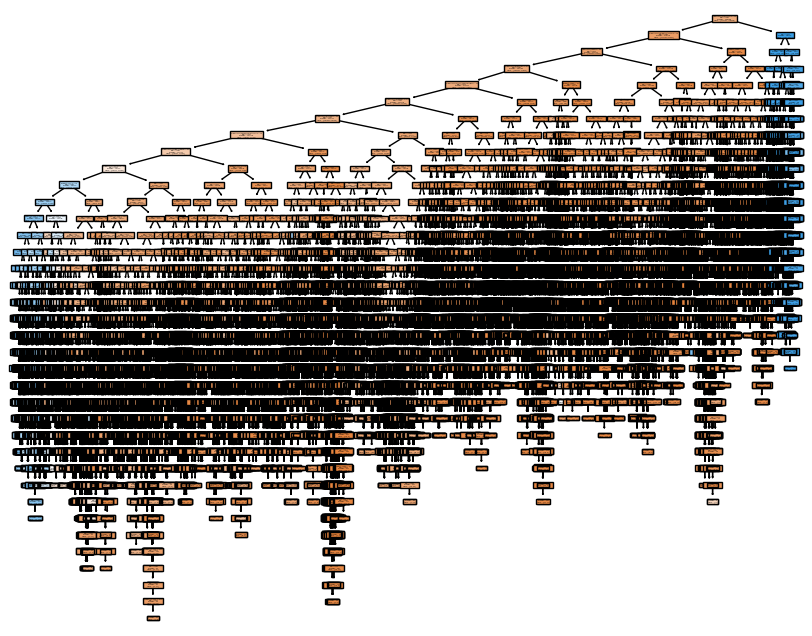

In [37]:
from sklearn.tree import plot_tree

# Plot the pruned decision tree
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns)
plt.show()


#### Prune

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier with limited depth
decision_tree_pruned = DecisionTreeClassifier(criterion='gini', max_depth=3)

# Fit the pruned model
decision_tree_pruned.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

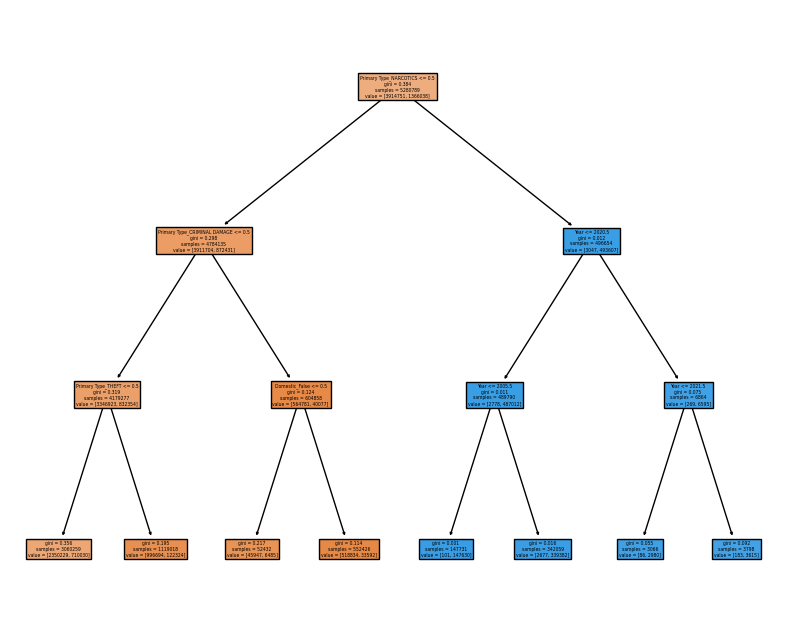

In [39]:
from sklearn.tree import plot_tree

# Plot the pruned decision tree
plt.figure(figsize=(10, 8))
plot_tree(decision_tree_pruned, filled=True, feature_names=X_train.columns)
plt.show()


In [40]:
import pandas as pd

# Create a dataframe of feature importances
feature_importances = pd.DataFrame(decision_tree_pruned.feature_importances_, index=X_train.columns, columns=['Importance'])

# Sort the feature importances in descending order
sorted_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the top 3 features
top_features = sorted_importances.head(3)
print("Top 3 Features:")
print(top_features)


Top 3 Features:
                              Importance
Primary Type_NARCOTICS          0.931257
Primary Type_THEFT              0.038773
Primary Type_CRIMINAL DAMAGE    0.029333


### Random forrest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score

# Create a Random Forest Classifier with 100 estimators
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [42]:
# Predict the test data
y_pred_rf = random_forest.predict(X_test)

# Calculate precision, recall, and accuracy
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"Accuracy: {accuracy_rf * 100:.2f}%")


Precision: 0.8692261338739284
Recall: 0.5477278513797069
Accuracy: 86.16%


In [43]:
from sklearn.metrics import confusion_matrix

# Predict the test data
y_pred_rf = random_forest.predict(X_test)

# Create confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix:")
print(cm_rf)


Confusion Matrix:
[[1267116   37544]
 [ 206057  249547]]


In [44]:
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()

# Calculate false-positive rate (FPR)
fpr_rf = fp_rf / (fp_rf + tn_rf)

# Calculate false-negative rate (FNR)
fnr_rf = fn_rf / (fn_rf + tp_rf)

print(f"False Positive Rate: {fpr_rf:.4f}")
print(f"False Negative Rate: {fnr_rf:.4f}")


False Positive Rate: 0.0288
False Negative Rate: 0.4523


In [45]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with a large number of max features
random_forest_large = RandomForestClassifier(n_estimators=100, max_features=10, random_state=0)

# Fit the model
random_forest_large.fit(X_train, y_train)

# Predict the test data
y_pred_large = random_forest_large.predict(X_test)

# Calculate accuracy
accuracy_large = accuracy_score(y_test, y_pred_large)

print(f"Accuracy with large max features: {accuracy_large * 100:.2f}%")


Accuracy with large max features: 86.16%


In [55]:
# Calculate accuracy and false positive rate for each model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
fpr_logistic = fp / (fp + tn)

accuracy_decision_tree = accuracy_score(y_test, y_pred_dt)
fpr_decision_tree = fp_dt / (fp_dt + tn_dt)

accuracy_random_forest = accuracy_score(y_test, y_pred_rf)
fpr_random_forest = fp_rf / (fp_rf + tn_rf)

# Write out summarizing information
print("Model Performance Summary:")
print("---------------------------")
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logistic * 100:.2f}%")
print(f"False Positive Rate: {fpr_logistic:.4f}")
print("---------------------------")
print("Decision Tree:")
print(f"Accuracy: {accuracy_decision_tree * 100:.2f}%")
print(f"False Positive Rate: {fpr_decision_tree:.4f}")
print("---------------------------")
print("Random Forest:")
print(f"Accuracy: {accuracy_random_forest * 100:.2f}%")
print(f"False Positive Rate: {fpr_random_forest:.4f}")


Model Performance Summary:
---------------------------
Logistic Regression:
Accuracy: 85.60%
False Positive Rate: 0.0285
---------------------------
Decision Tree:
Accuracy: 86.16%
False Positive Rate: 0.0285
---------------------------
Random Forest:
Accuracy: 86.16%
False Positive Rate: 0.0288


### Unsup learn

In [68]:
from sklearn.neighbors import KNeighborsClassifier

# Create a kNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict the test data
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy of kNN model: {accuracy_knn * 100:.2f}%")


Accuracy of kNN model: 84.11%


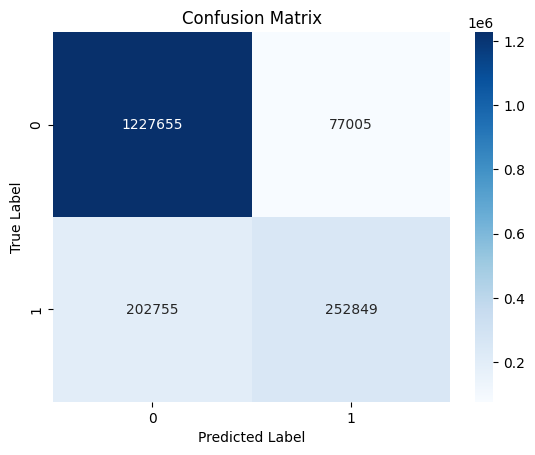

In [74]:
 from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cmKnn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix as a heatmap
sns.heatmap(cmKnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [82]:
# Generate classification report
classification_rep = classification_report(y_test, y_pred_knn)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90   1304660
           1       0.77      0.55      0.64    455604

    accuracy                           0.84   1760264
   macro avg       0.81      0.75      0.77   1760264
weighted avg       0.83      0.84      0.83   1760264



#### Tuning KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a kNN model
knn = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Evaluate the model
accuracy = best_knn.score(X_test, y_test)
print(f"Accuracy with tuned parameters: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time= 2.4min
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time= 2.4min
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time= 2.5min
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time= 2.4min
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time= 2.4min
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time= 2.3min
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time= 2.3min
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time= 2.3min
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time= 2.3min
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time= 2.4min
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time= 2.5min
[CV] END ...metric=euclidean, n_neighbors=5, wei

In [85]:
print(f"Best parameters: {best_params}")

Best parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [86]:
crime_data_full.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude
Date,,,,,,,,,,,,,,
2023-03-10 23:57:00,001XX W LAKE ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,CTA PLATFORM,True,False,32.0,15,1175301.0,1901735.0,2023,41.885741,-87.631712
2023-03-10 23:50:00,036XX S IRON ST,0820,THEFT,$500 AND UNDER,COMMERCIAL / BUSINESS OFFICE,False,False,59.0,06,1167949.0,1880705.0,2023,41.828195,-87.659316
2023-03-10 23:46:00,008XX E 93RD ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,44.0,15,1183367.0,1843485.0,2023,41.725714,-87.603908
2023-03-10 23:40:00,100XX S LAFAYETTE AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,49.0,26,1177696.0,1838416.0,2023,41.711934,-87.624833
2023-03-10 23:38:00,042XX N MILWAUKEE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,False,False,15.0,14,1142261.0,1927902.0,2023,41.958223,-87.752391


### predicting block

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Prepare the Data
crime_data_block = crime_data_full
X = crime_data_block.drop('Block', axis=1)  # Features (excluding the target variable)
y = crime_data_block['Block']  # Target variable

In [23]:
# Step 2: Select Features
selected_features = ['Location Description', 'Primary Type', 'Year', 'Community Area']
X_selected = X[selected_features]

In [24]:
# Step 3: Preprocess the Data
encoder = LabelEncoder()
X_encoded = X_selected.apply(encoder.fit_transform)


In [ ]:
# Step 4: Build and Train the Model
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)
model = RandomForestClassifier(n_estimators=1+00, random_state=0, verbose=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1


In [ ]:
# Step 5: Evaluate the Model
y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)

In [ ]:
# Step 6: Test the Model
y_pred_test = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

In [ ]:
# Step 7: Deploy and Use the Model
new_crime_data = pd.read_csv('Documents/Repos/Big-Data-Project-Crimes-in-Chicargo/crimes_2022.csv')
X_new = new_crime_data[selected_features]
X_new_encoded = X_new.apply(encoder.transform)
predicted_blocks = model.predict(X_new_encoded)
print("Predicted Blocks:", predicted_blocks)